# Test ratail

**Autor**: Edward Guevara \
**Fecha**: 06/15/2023 \
**Ultima modificacino**: 06/15/2023 \
**objetivos**: 
1. Describir los clientes de la tienda en base a su información transaccional
2. Crear un modelo que nos permita detectar a los clientes que son buenos compradores para ofrecerles descuentos personalizados.


# Introduccion

Cuando una tienda minorista (ratail), quiere retener clientes e incrementar las ventas, es necesario conocer el comportamiento de los clientes para ofrecerles ofertas personalizadas. En cuanto se consiga venderles **X** producto, venderles **Y** y **Z** productos sera mas facil. Por lo tanto, se requiere conocer cual son las variables que tienen mayor influencia para identificar buenos clientes y ofrecerles ofertas personalizadas.


Descripcion de las Variables:

1. transaction_data.csv
    * household_key: Identificación única del cliente.
    * BASKET_ID: Identificación única de la  transacción.
    * PRODUCT_ID: Identificación única del producto.
    * QUANTITY: Cantidad de productos comprados.
    * SALES_VALUE: Monto en dolares de la compra.
    * STORE_ID: Identificación única de cada tienda.
    * WEEK_NO: Semana en que se realizó la transacción (1 - 102)
2. product.csv
    * PRODUCT_ID: Identificación única del producto.
    * MANUFACTURER: Código del proveedor.
    * DEPARTMENT: Departamento al cual pertenece un producto .
    * BRAND: Indica si la marca del producto es internacional o nacional.
    * COMMODITY_DESC:Categoría al que pertenece el producto.
3. hh_demographic.csv
    * AGE_DESC: Rango de edad estimado.
    * MARITAL_STATUS_CODE: Estado marital del cliente.
    * INCOME_DESC: Ingresos del cliente.
    * household_key: ID por cada cliente
    * label: Indica si el cliente es buen comprador o no (0= mal comprador, 1=buen comprador)


#  Conocimientos basicos del dataset

## Setup

In [53]:
import pandas as pd
import numpy as np

## Importacion de datos

In [54]:
transaction_data = pd.read_csv("./dataset_retail_test_with_modelling/transaction.csv", sep = ',')
product_data = pd.read_csv("./dataset_retail_test_with_modelling/product.csv", sep = ',')
demographic_data = pd.read_csv("./dataset_retail_test_with_modelling/demographic.csv", sep = ',')

**transaction_data**

In [55]:
transaction_data.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO
0,2375,26984851472,1004906,1,1.39,364,1
1,2375,26984851472,1033142,1,0.82,364,1
2,2375,26984851472,1036325,1,0.99,364,1
3,2375,26984851472,1082185,1,1.21,364,1
4,2375,26984851472,8160430,1,1.50,364,1


**product_data**

In [56]:
product_data.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC
0,25671,2,GROCERY,National,FRZN ICE
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION
2,26093,69,PASTRY,Private,BREAD
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE
4,26355,69,GROCERY,Private,COOKIES/CONES


**demographic_data**

In [57]:
demographic_data.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,household_key,label
0,65+,A,35-49K,1,0
1,45-54,A,50-74K,7,1
2,25-34,U,25-34K,8,0
3,25-34,U,75-99K,13,0
4,45-54,B,50-74K,16,0


Se uniran los tres dataset en las columnas correspondientes para obtener un solo dataset que contenga toda la informacion para el analisis.

In [58]:
df = pd.merge(transaction_data, product_data, on='PRODUCT_ID')
df = pd.merge(df, demographic_data, on='household_key')
df.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,label
0,1929,27021022215,1004906,1,1.39,441,1,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
1,1929,27601005106,1004906,1,1.99,441,8,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
2,1929,28110785584,1004906,1,1.00,292,14,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
3,1929,30032381853,1004906,1,2.99,441,30,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
4,1929,30035429101,1004906,1,2.99,292,30,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1


## Tipos de datos

In [59]:
print('Tipos de datos por columna: \n')
display(df.dtypes)

Tipos de datos por columna: 



household_key            int64
BASKET_ID                int64
PRODUCT_ID               int64
QUANTITY                 int64
SALES_VALUE            float64
STORE_ID                 int64
WEEK_NO                  int64
MANUFACTURER             int64
DEPARTMENT              object
BRAND                   object
COMMODITY_DESC          object
AGE_DESC                object
MARITAL_STATUS_CODE     object
INCOME_DESC             object
label                    int64
dtype: object

## Descripcion Estadistica

**Variables tipo numericas**

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
household_key,1427303.0,1.270911e+03,7.413937e+02,1.000000e+00,6.310000e+02,1.260000e+03,1.939000e+03,2.499000e+03
BASKET_ID,1427303.0,3.415043e+10,4.680249e+09,2.698490e+10,3.058042e+10,3.289548e+10,4.012860e+10,4.230271e+10
PRODUCT_ID,1427303.0,2.952598e+06,3.887443e+06,2.567100e+04,9.186635e+05,1.029743e+06,1.134533e+06,1.831630e+07
QUANTITY,1427303.0,1.148580e+02,1.252137e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.963800e+04
SALES_VALUE,1427303.0,3.151199e+00,4.251720e+00,0.000000e+00,1.290000e+00,2.090000e+00,3.490000e+00,8.400000e+02
STORE_ID,1427303.0,3.352289e+03,9.243143e+03,1.000000e+00,3.330000e+02,3.750000e+02,4.240000e+02,3.428000e+04
WEEK_NO,1427303.0,5.709954e+01,2.668867e+01,1.000000e+00,3.500000e+01,5.800000e+01,8.000000e+01,1.020000e+02
MANUFACTURER,1427303.0,1.004945e+03,1.370763e+03,1.000000e+00,6.900000e+01,5.390000e+02,1.256000e+03,6.477000e+03
label,1427303.0,5.112790e-01,4.998729e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Variables tipo objeto**

In [61]:
df.describe(include=['object']).T

,count,unique,top,freq
DEPARTMENT,1427303,41,GROCERY,896407
BRAND,1427303,2,National,1025428
COMMODITY_DESC,1427303,305,SOFT DRINKS,60183
AGE_DESC,1427303,6,45-54,520586
MARITAL_STATUS_CODE,1427303,3,A,641796
INCOME_DESC,1427303,12,50-74K,348536


## Info

In [62]:
print('Informacion resumida del tipo de datos y valores no-null: \n')
display(df.info())

Informacion resumida del tipo de datos y valores no-null: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427303 entries, 0 to 1427302
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   household_key        1427303 non-null  int64  
 1   BASKET_ID            1427303 non-null  int64  
 2   PRODUCT_ID           1427303 non-null  int64  
 3   QUANTITY             1427303 non-null  int64  
 4   SALES_VALUE          1427303 non-null  float64
 5   STORE_ID             1427303 non-null  int64  
 6   WEEK_NO              1427303 non-null  int64  
 7   MANUFACTURER         1427303 non-null  int64  
 8   DEPARTMENT           1427303 non-null  object 
 9   BRAND                1427303 non-null  object 
 10  COMMODITY_DESC       1427303 non-null  object 
 11  AGE_DESC             1427303 non-null  object 
 12  MARITAL_STATUS_CODE  1427303 non-null  object 
 13  INCOME_DESC          1427303 non-null  obj

None

## Dataset final

Basado en los conocimientos basicos del datasets unificado. Este esta bastante limpio y listo para el analisis. Por lo tanto, se guardara el dataset unficado con el nombre `test_ratail.csv` 

In [63]:
df.to_csv('ratail_dataset.csv', index=False)

# Analisis exploratorio de datos

# Setup

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Importacion de datos

In [247]:
df = pd.read_csv("./ratail_dataset.csv", sep = ',')
df.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,label
0,1929,27021022215,1004906,1,1.39,441,1,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
1,1929,27601005106,1004906,1,1.99,441,8,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
2,1929,28110785584,1004906,1,1.00,292,14,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
3,1929,30032381853,1004906,1,2.99,441,30,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1
4,1929,30035429101,1004906,1,2.99,292,30,69,PRODUCE,Private,POTATOES,35-44,B,25-34K,1


# Analisis de carrelacion

## Matriz de correlacion

Calculo de correlacion de variables numericas tipo `int64` o `float64`.

In [248]:
var = ["household_key", "BASKET_ID", "PRODUCT_ID", "QUANTITY",
       "SALES_VALUE", "STORE_ID", "WEEK_NO", "MANUFACTURER", "label"]
corr_matrix = df[var].corr()

Visualizacion en mapa de calor (heatmap) de la matriz de correlacion.

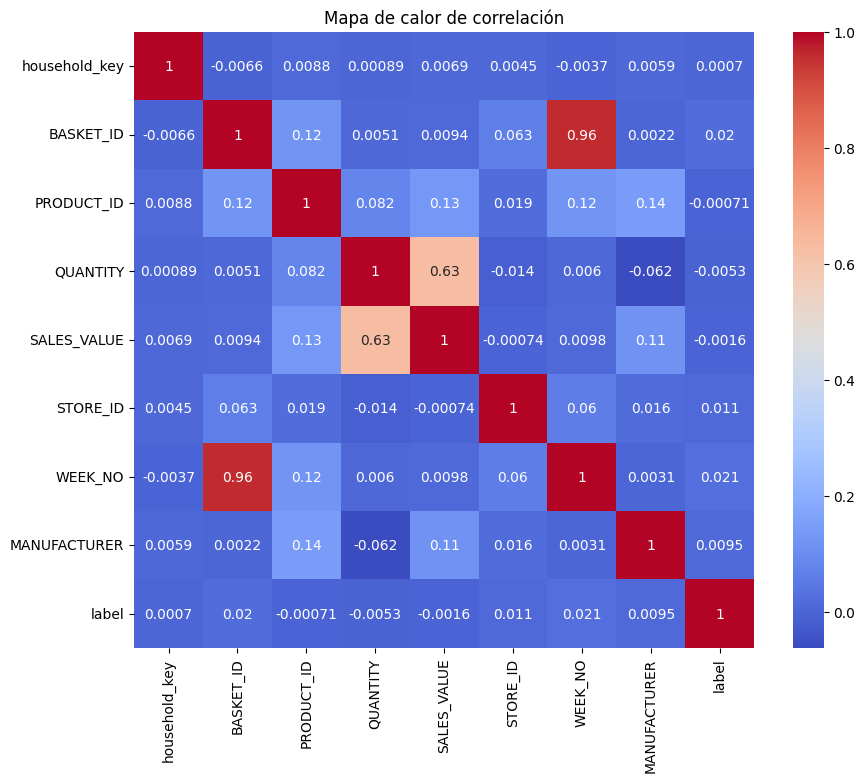

In [249]:
plt.figure(figsize=(10,8)) # Establece el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Mapa de calor de correlación')
plt.show()

**Observacion**:

La vizulizacion de la matriz de correlacion anterior, muestra una correlacion positiva entre la variable 'MANUFACTURE' y 'BASKET_ID'. Sin embargo, estas variables de identificacion como: 'household_key', 'BASKET_ID', 'PRODUCT_ID', 'STORE_ID' y 'MANUFACTURER'. No se usaran en este analisis, debido al caracter preliminar de este. Solo llevaremos un analisis mas profundo de correlacion entre las variables: 'QUANTITY', 'SALES_VALUE', 'WEEK_NO entre la variable objetivo 'label'.

## P-value 

**Calculo de p-value entre las variables 'QUANTITY', 'SALES_VALUE', 'WEEK_NO' y 'label'**

In [250]:
num_var = ['QUANTITY', 'SALES_VALUE', 'WEEK_NO']

for var in num_var:
    pearson_coef, p_value = stats.pearsonr(df[var], df['label'])
    print("El coeficiente pearson de correlaicon es ", pearson_coef, " con un P-value de P =", p_value)  

El coeficiente pearson de correlaicon es  -0.005268346910595469  con un P-value de P = 3.0914662715030064e-10
El coeficiente pearson de correlaicon es  -0.0016333397544671276  con un P-value de P = 0.051015767622735624
El coeficiente pearson de correlaicon es  0.021429630522022295  con un P-value de P = 1.347094074300816e-144


p-value < 0.001, lo que significa que hay una fuerte correlacion entre las variables 'QUANTITY' y label', Aunque no hay una relacion lineal entre estas variables (-0.005268346910595469). \
**conclusion**: 'QUATITY' es una variable predictora.  

p-value =~ 0.05, lo que significa que hay una ligera correlacion entre las variables 'SALES_VALUE' y label', Aunque tampoco hay una relacion lineal entre estas variables (-0.0016333397544671276). Sin embrago la variable 'QUANTITY' y 'SALES_VALUE' presenta una relacion lineal de 0.63. Esto significa una correlacion positiva moderada. Un aumento de la cantidad de productos presenta tambien un aumento en el valor de venta. 

**conclusion**: 'SALES_VALUES'es una variable predictora indirecta.  

p-value < 0.001, lo que significa que hay una fuerte correlacion entre las variables 'WEEK_NO' y label', tampoco hay una relacion lineal entre estas variables (-0.005268346910595469). 

**conclusion**: 'SALES_VALUES'es una variable predictora. 

# Analisis de distribucion 

## Con variables numericas

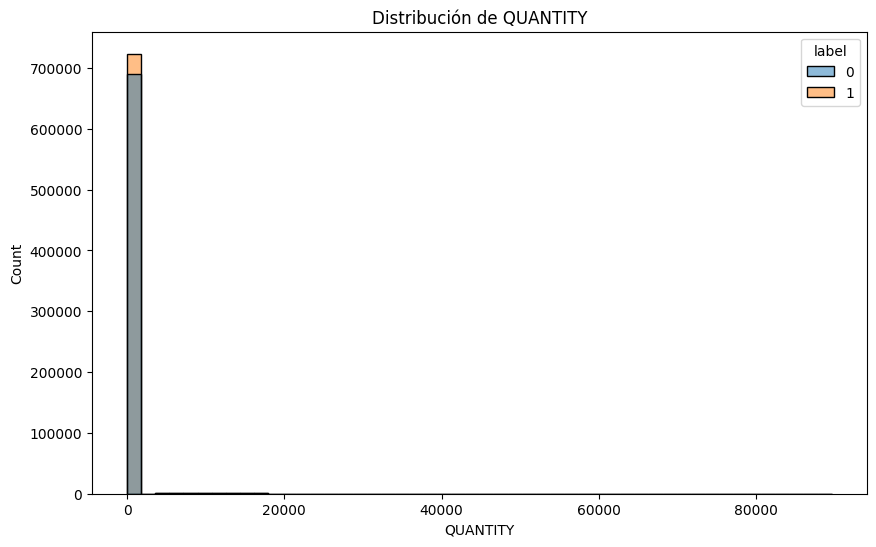

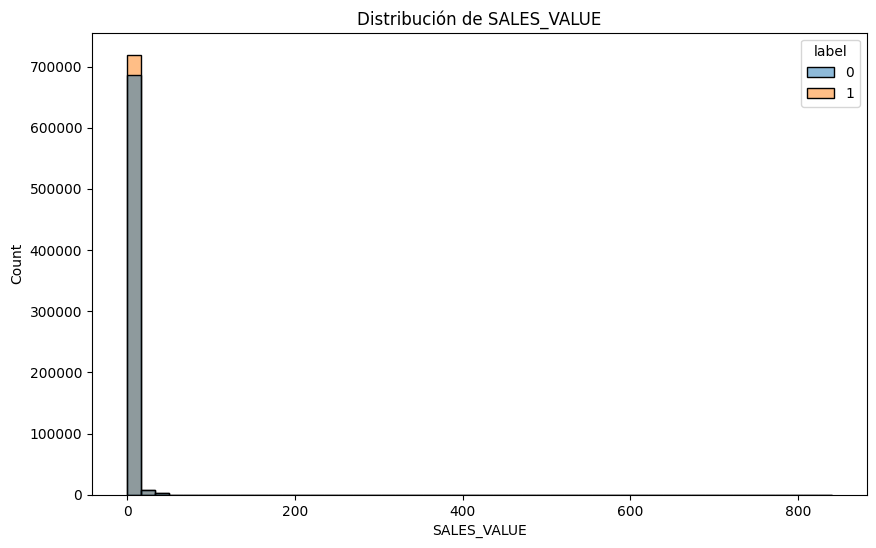

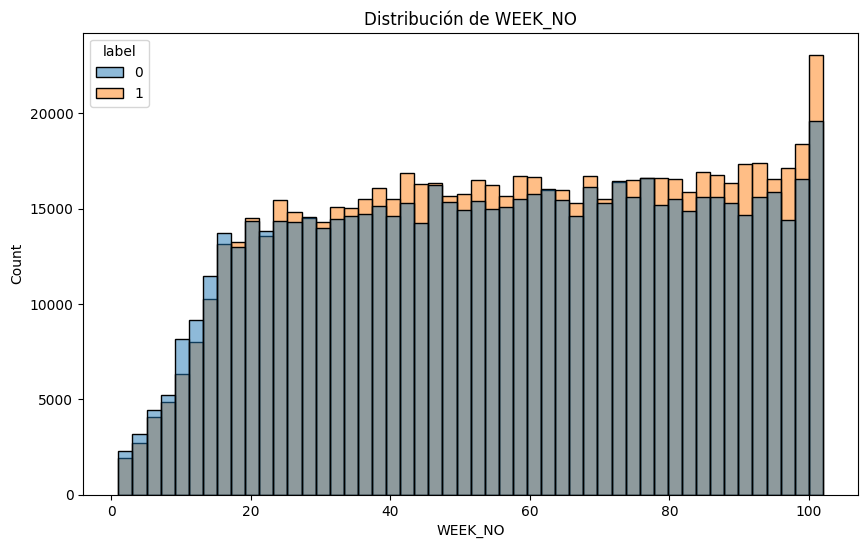

In [251]:
for column in num_var:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, hue = 'label', bins = 50)
    plt.title(f"Distribución de {column}")
    plt.show()

**Observacion**: 
1. Las variables 'QUANTITY' y 'SALES_VALUE' no presentan ningun patron o tendencia significativa en su distribucion con la variable objetivo.
2. Durante las primeras semanas, hay una mayor presencia de malos clientes. Si embargo el escenario cambia en las siguientes semanas cuando el numero de buenos clientes aumenta.   

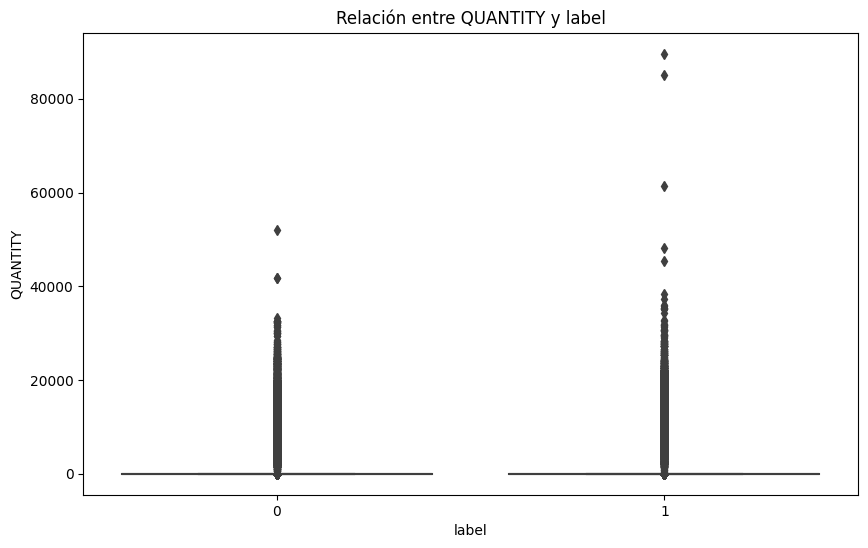

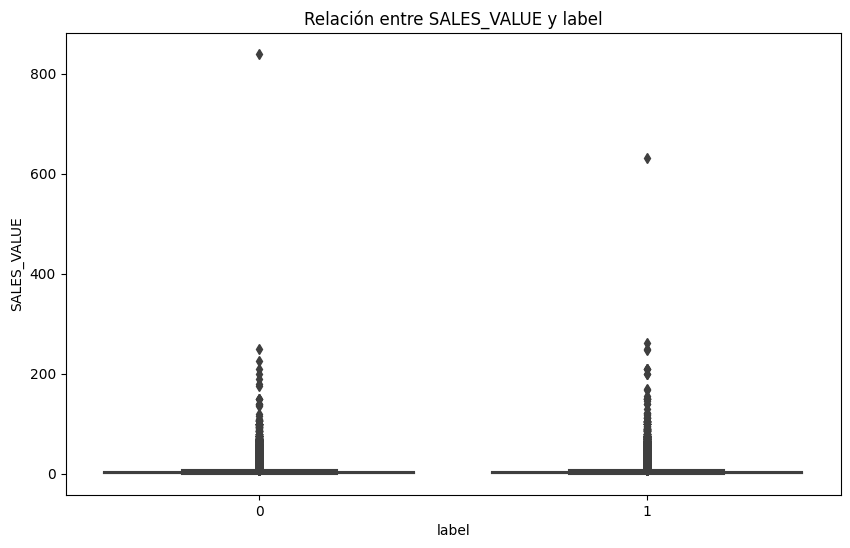

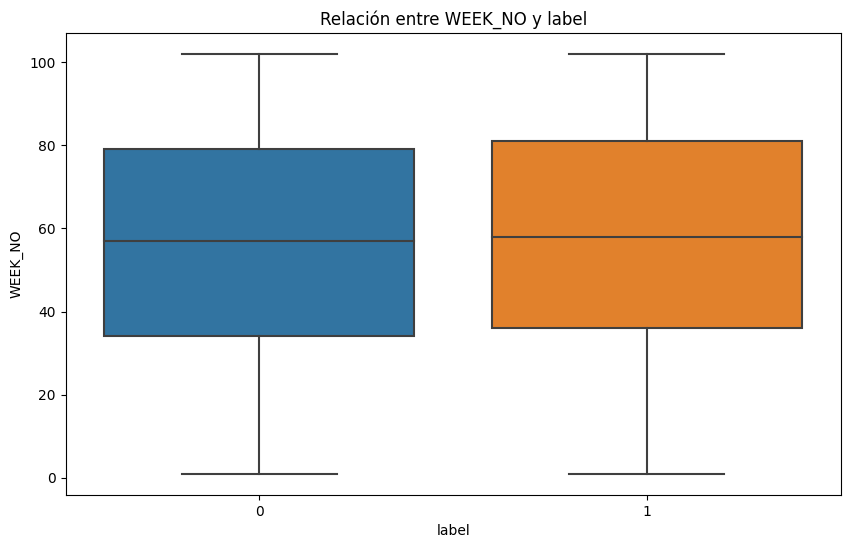

In [252]:
for column in num_var:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, y= column, x = 'label')
    plt.title(f"Relación entre {column} y label")
    plt.show()

**Observacion**:
A traves de la visualizacion en graficas de cajas no hay patrones o tendencias que permitan visualizar alguna relacion con la varible objetivo. Sin embargo en las graficas de distribucio de las variables 'QUANTITY' y 'SALES_VALUES' se obsevan valores atipicos.

## Con variables categoricas

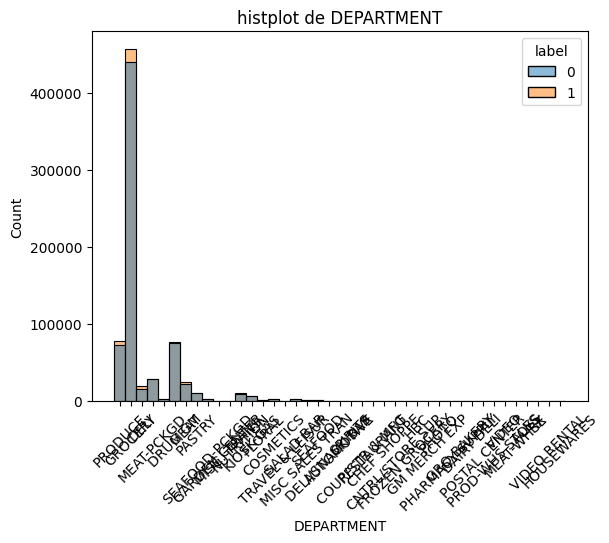

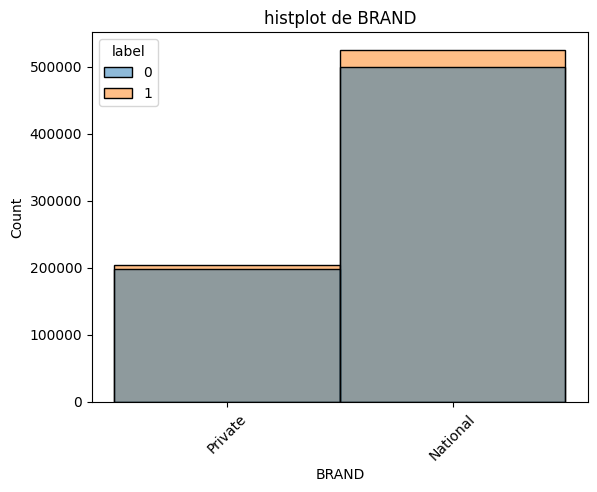

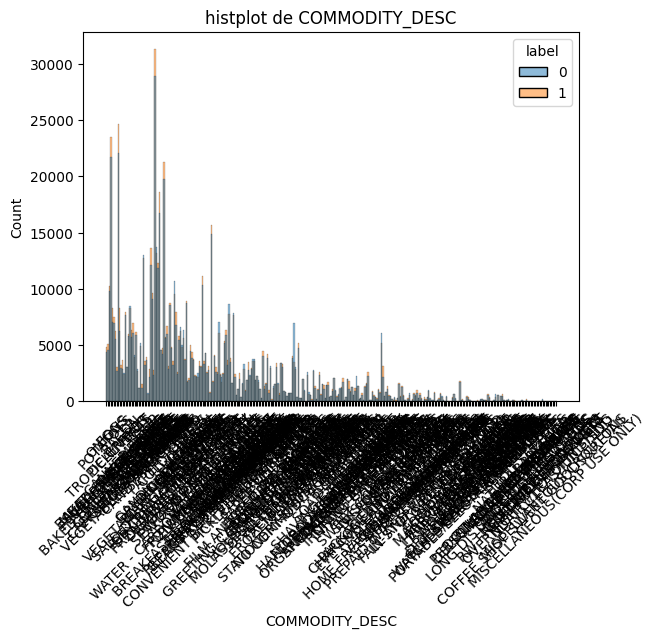

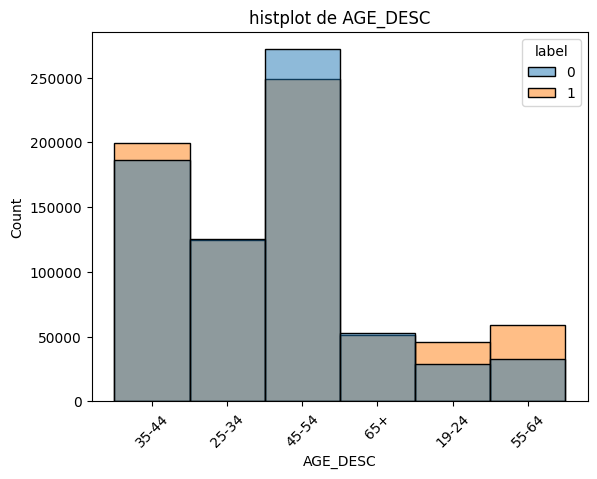

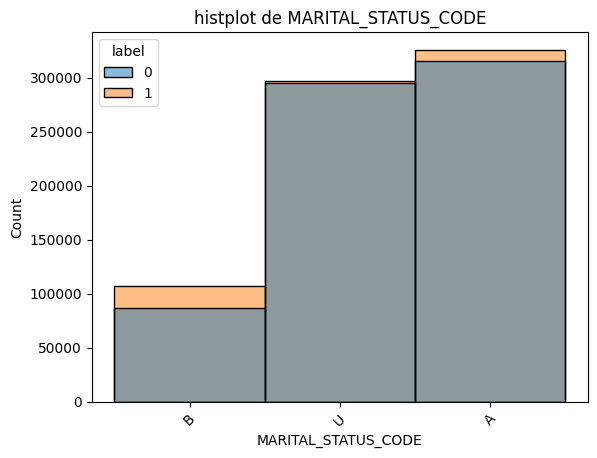

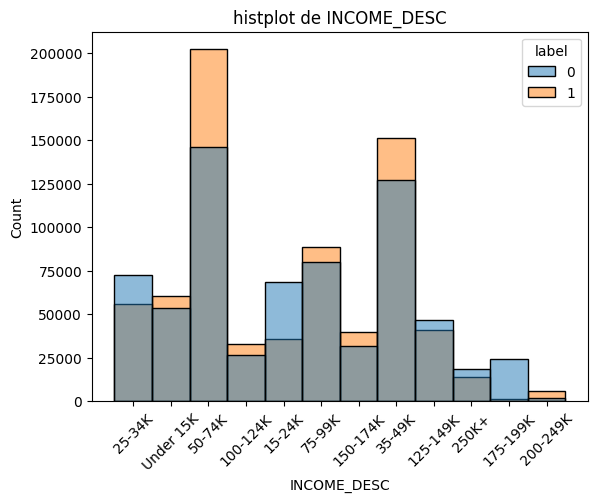

In [253]:
cat_var = ['DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC']
for column in cat_var:
    sns.histplot(data = df, x = column, hue = 'label')
    plt.title(f"histplot de {column}")
    plt.xticks(rotation=45)
    plt.show()

**Observaciones**:
1. Tanto buenos clientes como malos clientes se distribiyen de forma similar por departamento.
2. Los buenos clientes y malos clientes tiene un compartamiento similar en comprar marcas nacionales o internacionales.
3. En el grupo de edad de 45-54, los malos clientes son la mayoria y en los demas grupos, es lo contrario. En los grupos de edad de 35-44, 19-24 y 55-64, los buenos clientes son la mayoria. Esto puede dar indicios para identificar buenos cliente de malos clientes. 
4. El estodo civil de los clinetes se distribuye de forma similar entre buenos y malos clientes.
5.  Los rango de ingresos donde se oberva una gran diferencia entre buenos y malos clientes, son en los rangos: 175 - 1999k y 15 - 24k.

# Analisis de chi-cuadrado

Creacion de una tabla de contingencia por cada variable categorica y la variable objetivo y realiza la prueba de chi-cuadrado 

In [254]:
for var in cat_var:
    contingency_table = pd.crosstab(df[var], df['label'])
    _, p, _, _ = chi2_contingency(contingency_table)
    print(f"La variable {var} es {'dependiente' if p < 0.05 else 'independiente'} de la variable 'label'")

La variable DEPARTMENT es dependiente de la variable 'label'
La variable BRAND es dependiente de la variable 'label'
La variable COMMODITY_DESC es dependiente de la variable 'label'
La variable AGE_DESC es dependiente de la variable 'label'
La variable MARITAL_STATUS_CODE es dependiente de la variable 'label'
La variable INCOME_DESC es dependiente de la variable 'label'


Las variables categoricas, en su totalidad son variables dependientes de la variable objetivo, por lo tanto son potenciales caracteristicas para identificar buenos de malos clientes. 

# Variables con potencial predictorio
1. 'QUANTITY' 
2. 'SALES_VALUE'
3. 'WEEK_NO'
4. 'DEPARTMENT'
5. 'BRAND' 
6. 'COMMODITY_DESC' 
7. 'AGE_DESC' 
8. 'MARITAL_STATUS_CODE' 
9. 'INCOME_DESC'

# Preparacion de datos

# Setup

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importar dataset

In [16]:
df = pd.read_csv("./ratail_dataset.csv", sep = ",")

# Balance de datos

La siguiente tabla que muestra el balance de datos de la variable objetivo.

In [17]:
balance_data = df['label'].value_counts()
pd.DataFrame(balance_data)

,count
label,
1,729750
0,697553


Para visualizar el conteo de una manera mas facil, se utliza una grafica de baras.

<Axes: xlabel='label', ylabel='Count'>

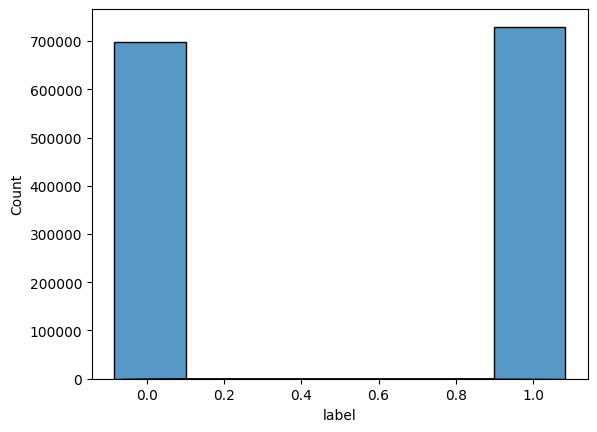

In [18]:
sns.histplot(data = df, x = 'label', shrink= 10.5)

El dataset esta balancedo!

# One-Hot-Encoding

In [19]:
cat_var = ['DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC']
for var in cat_var:
    dummy_variable = pd.get_dummies(df[var])
    # Unir "df" and "dummy_variable" 
    df = pd.concat([df, dummy_variable], axis=1)
    # eliminar columna original desde "df"
    df.drop(var, axis = 1, inplace=True)  
df

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,label,,...,15-24K,150-174K,175-199K,200-249K,25-34K,250K+,35-49K,50-74K,75-99K,Under 15K
0,1929,27021022215,1004906,1,1.39,441,1,69,1,False,...,False,False,False,False,True,False,False,False,False,False
1,1929,27601005106,1004906,1,1.99,441,8,69,1,False,...,False,False,False,False,True,False,False,False,False,False
2,1929,28110785584,1004906,1,1.00,292,14,69,1,False,...,False,False,False,False,True,False,False,False,False,False
3,1929,30032381853,1004906,1,2.99,441,30,69,1,False,...,False,False,False,False,True,False,False,False,False,False
4,1929,30035429101,1004906,1,2.99,292,30,69,1,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427298,2364,42233246043,2000699,1,2.43,673,102,781,1,False,...,False,False,False,False,True,False,False,False,False,False
1427299,2364,42233246043,2022006,2,0.72,673,102,69,1,False,...,False,False,False,False,True,False,False,False,False,False
1427300,2364,42233246043,2043340,1,1.00,673,102,282,1,False,...,False,False,False,False,True,False,False,False,False,False
1427301,2364,42233246043,2058243,1,1.25,673,102,890,1,False,...,False,False,False,False,True,False,False,False,False,False


# Train test split

In [20]:
# Variable objetivo
y = df['label']
# datos
X = df.drop(['label'], axis = 1)
# particion del dataset en datos de entrenamiento y prueba en la proporcion 70-30, respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Guardar dataset

In [22]:
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

# Random Forest model

# Setup

Primero se debe instalar la libreria **KerasTuner** con `pip install keras-tuner -q` e importarla de la siguiente como `import keras_tuner`

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from joblib import dump
from sklearn import metrics
from tensorflow import keras
import keras_tuner
import glob

# Importar datos de entrenamiento

In [13]:
X_train = pd.read_csv('X_test.csv').to_numpy()
y_train = pd.read_csv('y_test.csv').to_numpy()
y_train = np.ravel(y_train)

# Construccion del modelo

Definimos una funcion que reciba el argumento `hp` y la configuracion de hiperparametros como se muestra a continuacion donde la funcion `Int` indica que un hiperparámetro es un número entero como el numero de estimadores `n_estimators` y profundidad maxima `max_depth`.

In [14]:
def build_model(hp):
    n_estimators = hp.Int("n_estimators", 50, 200, 10)
    max_depth = hp.Int("max_depth", 5, 20, 1)
    model = RandomForestClassifier(
        n_estimators = n_estimators,
        max_depth = max_depth
    )
    return model

# Evaluacion y seleccion del modelo

## Evaluacion del modelo (*k*-fold-cross-validation)

Definimos la funcion `StratifiedKFold` para generar la validacion cruzada y evaluar la capacidad de generalizacion del modelo.

In [15]:
cv = StratifiedKFold(n_splits = 10, random_state = None, shuffle = False)

## Seleccion del modelo (Bayesian Optimization)

Definimos la funcion `SklearnTuner` y el metodo seleccion de parametros `BayesianOptimizationOracle` que es recibida como un argumento de la funcion de ajuste de hiperparametros.

In [16]:
tuner = keras_tuner.tuners.SklearnTuner(
    oracle = keras_tuner.oracles.BayesianOptimizationOracle(
        objective = keras_tuner.Objective('score', 'max'),
        max_trials = 10
    ),
    hypermodel = build_model,
    scoring = metrics.make_scorer(metrics.accuracy_score),
    cv = cv,
    directory = 'SklearnTunerResults',
    project_name='RF_training',
    overwrite = True
    )

Iniciamos la busqueda de hiperparametros con funcion `search`.

In [17]:
tuner.search(X_train, y_train)

Trial 10 Complete [00h 25m 25s]
score: 0.8894301915237335

Best score So Far: 0.8911607165423157
Total elapsed time: 02h 38m 09s
INFO:tensorflow:Oracle triggered exit


Obtenemos el mejor modelo con la funcion `get_best_models`.

In [18]:
best_model = tuner.get_best_models(num_models = 1)[0]

# Guardar el modelo

In [19]:
dump(best_model, 'RF_model.joblib')

['RF_model.joblib']

# Evaluacion final

# Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow import keras
import joblib

# Importar modelo

In [2]:
model = joblib.load("RF_model.joblib")

# Importar datos de prueba

In [3]:
X_test = pd.read_csv("X_test.csv").to_numpy()
y_test = pd.read_csv("y_test.csv").to_numpy()
y_test = np.ravel(y_test)

## Evaluacion de modelo.

In [7]:
print("Test set score: {:.4f}".format(model.score(X_test, y_test)))

Test set score: 0.9051


## Matriz de confusion

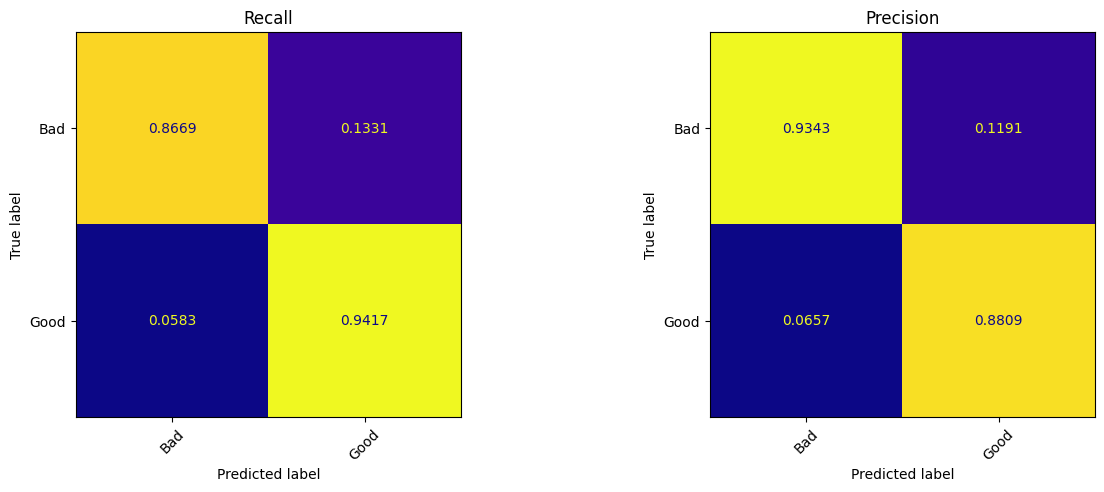

In [5]:
labels = ["Bad","Good"]
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ConfusionMatrixDisplay.from_predictions(y_test,  y_pred, display_labels = labels, 
                                        normalize = "true", xticks_rotation = 45, 
                                        values_format = ".4f", ax = ax[0], cmap = 'plasma', colorbar = False)
ax[0].set_title('Recall')
ax[0].grid(False)
ConfusionMatrixDisplay.from_predictions(y_test,  y_pred, display_labels = labels, 
                                        normalize = "pred", xticks_rotation = 45, 
                                        values_format = ".4f", ax = ax[1], cmap = 'plasma', colorbar = False)
ax[1].set_title('Precision')
ax[1].grid(False)

## Reporte de clasificacion

In [6]:
report = classification_report(y_test, y_pred, target_names = labels, digits = 4)
print(report)

              precision    recall  f1-score   support

         Bad     0.9343    0.8669    0.8994    209386
        Good     0.8809    0.9417    0.9103    218805

    accuracy                         0.9051    428191
   macro avg     0.9076    0.9043    0.9048    428191
weighted avg     0.9070    0.9051    0.9050    428191



# Analisis de resultados

El modelo Random Forests posee un rendimiento en terminos de presicion y recall ligeramente balanceado. Sin embargo, la evaluacion usando la metrica f1-score, el modelo posee una mayor capacidad para identificar buenos clientes con un 91.03 % de las veces. 

# Conclusion
En una tienda ratail para identificar buenos clientes y ofrecer descuentos personalizados, el modelo random forest desarrollado es lo suficientemente preciso con el 90.51 % de las veces que se utiliza para identificar buenos clientes. 

# Sugerencias

1. A partir de los datos analizados y los resultados obtenidos el modelo Random Forest tiene el potencial para llevarlo a produccion, evaluar nuevos resultados y monitorear el rendimiento.
2. Las variables de identificacion unica (ID) pueden ser utlizadas para la ingenieria de caracteristicas y hacer el modelo mas preciso.